# USA Real Estate Dataset

### realtor-data.csv (400k+ entries)
* **status** (Housing status - a. ready for sale or b. ready to build)
* **bed** (# of beds)
* **bath** (# of bathrooms)
* **acre_lot** (Property / Land size in acres)
* **city** (city name)
* **state** (state name)
* **zip_code** (postal code of the area)
* **house_size** (house area/size/living space in square feet)
* **prev_sold_date** (Previously sold date)
* **price** (Housing price, it is either the current listing price or recently sold price if the house is sold recently)

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



## **Data Processing**

In [2]:
Data = pd.read_csv("realtor-data.csv")


In [3]:
Data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
Data.isnull().sum()

status                 0
bed                87782
bath               86272
acre_lot           76017
city                  52
state                  0
zip_code             197
house_size         83525
prev_sold_date    266940
price                  0
dtype: int64

In [5]:
Data.dropna(inplace = True)

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108698 entries, 829 to 407889
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          108698 non-null  object 
 1   bed             108698 non-null  float64
 2   bath            108698 non-null  float64
 3   acre_lot        108698 non-null  float64
 4   city            108698 non-null  object 
 5   state           108698 non-null  object 
 6   zip_code        108698 non-null  float64
 7   house_size      108698 non-null  float64
 8   prev_sold_date  108698 non-null  object 
 9   price           108698 non-null  float64
 10  year            108698 non-null  int64  
 11  cityEnc         108698 non-null  int64  
 12  stateEnc        108698 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 11.6+ MB


In [23]:
Data.describe()

,bed,bath,acre_lot,zip_code,house_size,price,year,cityEnc,stateEnc
count,108698.000000,108698.000000,108698.000000,108698.000000,108698.000000,1.086980e+05,108698.000000,108698.00000,108698.000000
mean,3.666038,2.571022,3.948312,3497.615669,2315.163039,7.369702e+05,2006.674925,426.87319,2.574040
std,1.599682,1.482808,172.336937,2107.560920,1619.141554,1.265213e+06,10.334287,268.54732,2.094949
min,1.000000,1.000000,0.000000,802.000000,170.000000,1.000000e+04,1901.000000,0.00000,0.000000
25%,3.000000,2.000000,0.150000,2045.000000,1338.000000,2.990000e+05,2000.000000,168.00000,2.000000
50%,3.000000,2.000000,0.330000,2861.000000,1878.000000,4.499000e+05,2007.000000,425.00000,2.000000
75%,4.000000,3.000000,0.940000,5350.750000,2757.000000,7.250000e+05,2016.000000,664.00000,3.000000
max,33.000000,33.000000,18817.000000,12998.000000,20821.000000,6.000000e+07,2022.000000,875.00000,8.000000


## **Visualization and Analysis of Data**

In [6]:
plt.style.use('default')

Text(0, 0.5, 'Number')

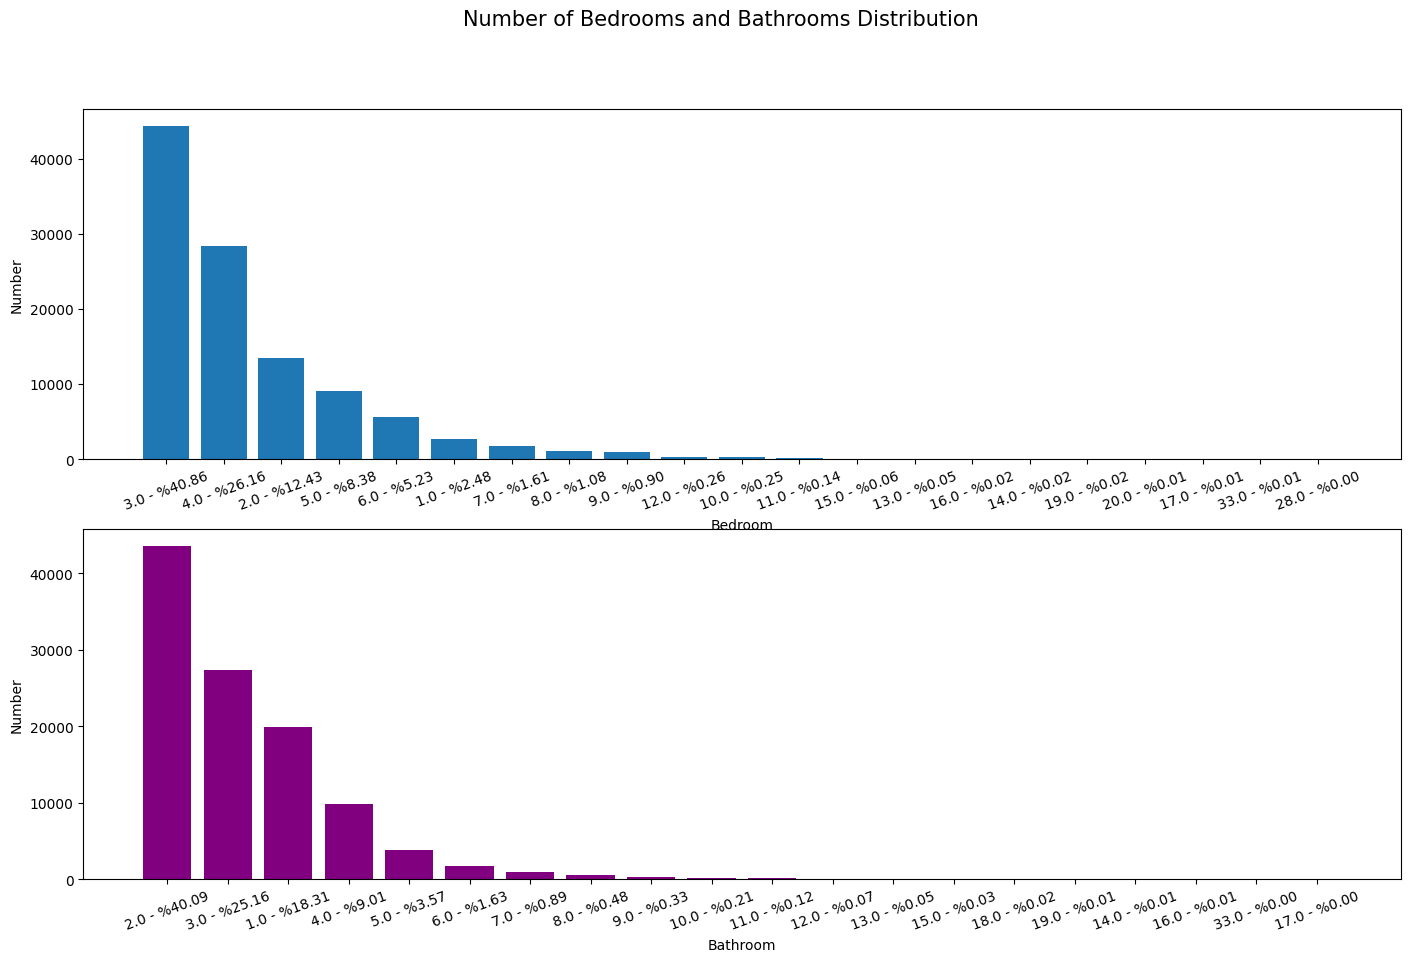

In [7]:
plt.figure(figsize=(17, 10))
plt.suptitle("Number of Bedrooms and Bathrooms Distribution", fontsize = 15)

# # # # # # # # # # # # # # # # # # # # # # # # Bedroom

bed = Data.value_counts("bed")
labels = list()
for i, j in enumerate(bed):
    labels.append("{} - %{:.2f}".format(bed.index[i], 100*j/bed.sum()))
    
plt.subplot(2,1,1)
plt.bar(labels, bed)
plt.xticks(rotation = 20)
plt.xlabel("Bedroom")
plt.ylabel("Number")

# # # # # # # # # # # # # # # # # # # # # # # # Bathroom

bath = Data.value_counts("bath")
labels = list()
for i, j in enumerate(bath):
    labels.append("{} - %{:.2f}".format(bath.index[i], 100*j/bath.sum()))
    
plt.subplot(2,1,2)
plt.bar(labels, bath, color = "purple")
plt.xticks(rotation = 20)
plt.xlabel("Bathroom")
plt.ylabel("Number")


Text(0.5, 1.0, 'Relation of Price to Bedroom and Bathroom')

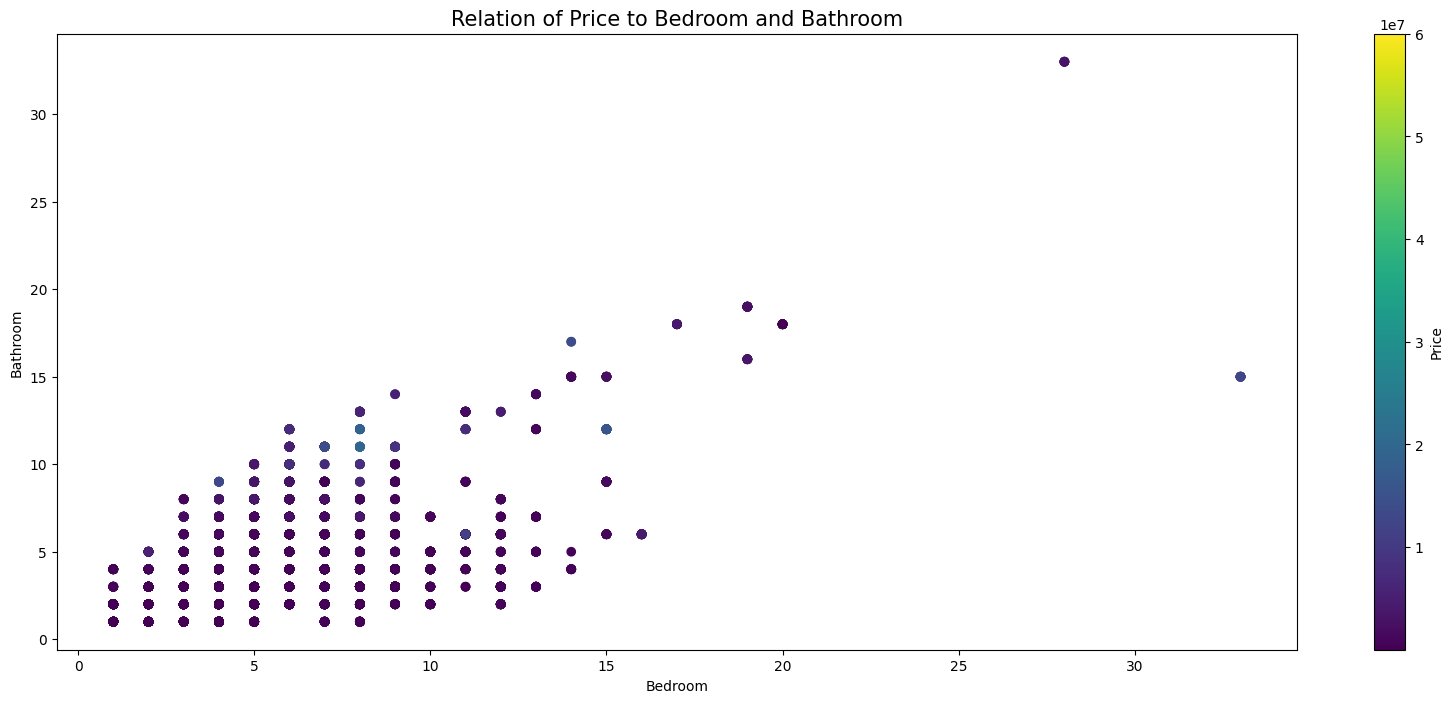

In [8]:
plt.figure(figsize=(20, 8))
x, y, z = Data["bed"], Data["bath"], Data["price"]

sc = plt.scatter(x, y, c = z)
plt.xlabel("Bedroom")
plt.ylabel("Bathroom")
plt.colorbar(sc, label = "Price")
plt.title("Relation of Price to Bedroom and Bathroom", fontsize = 15)

Text(0.5, 1.0, 'Real Estate Distribution by Province')

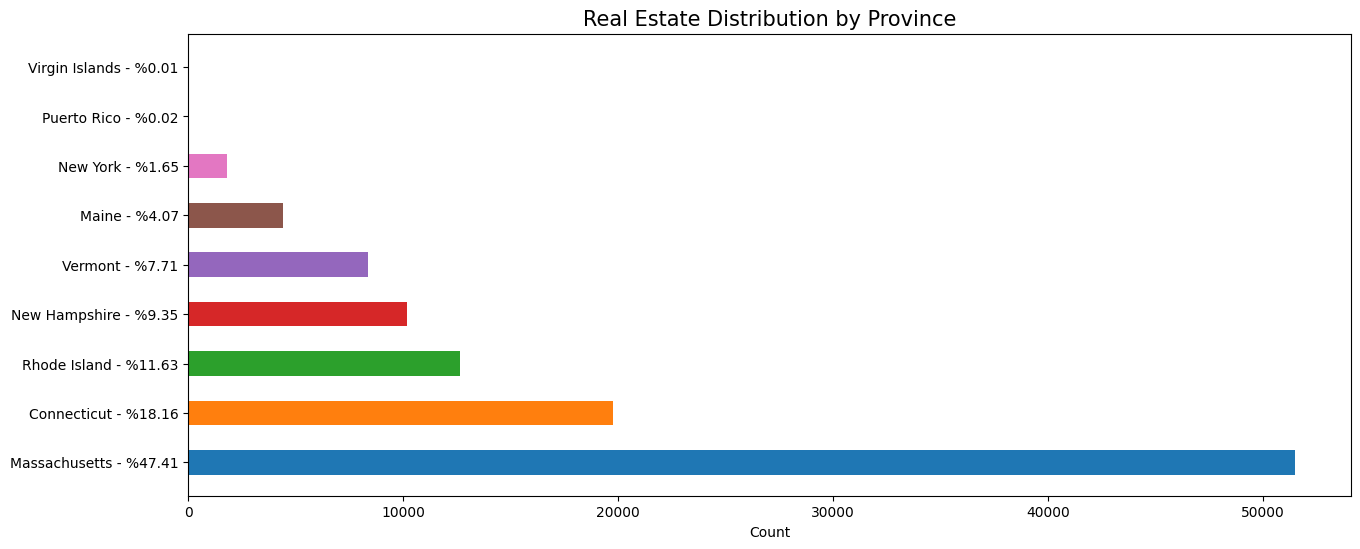

In [9]:
plt.figure(figsize = (15, 6))
stateCount = Data.value_counts("state")

for i, j in enumerate(bath):
    labels.append("{} - %{:.2f}".format(bath.index[i], 100*j/bath.sum()))

for i, j in enumerate(stateCount):
    label = "{} - %{:.2f}".format(stateCount.index[i], 100*j/stateCount.sum())
    plt.barh(label, j,height = 0.5)
    
plt.xlabel("Count")
plt.title("Real Estate Distribution by Province", fontsize = 15)

In [10]:
# I just create a new column with year value.
year = list()
for i in Data["prev_sold_date"]:
    year.append(int(str(i)[:4]))
Data["year"] = year
Data.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,year
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019
3380,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019
5083,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019
5387,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019
9053,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019


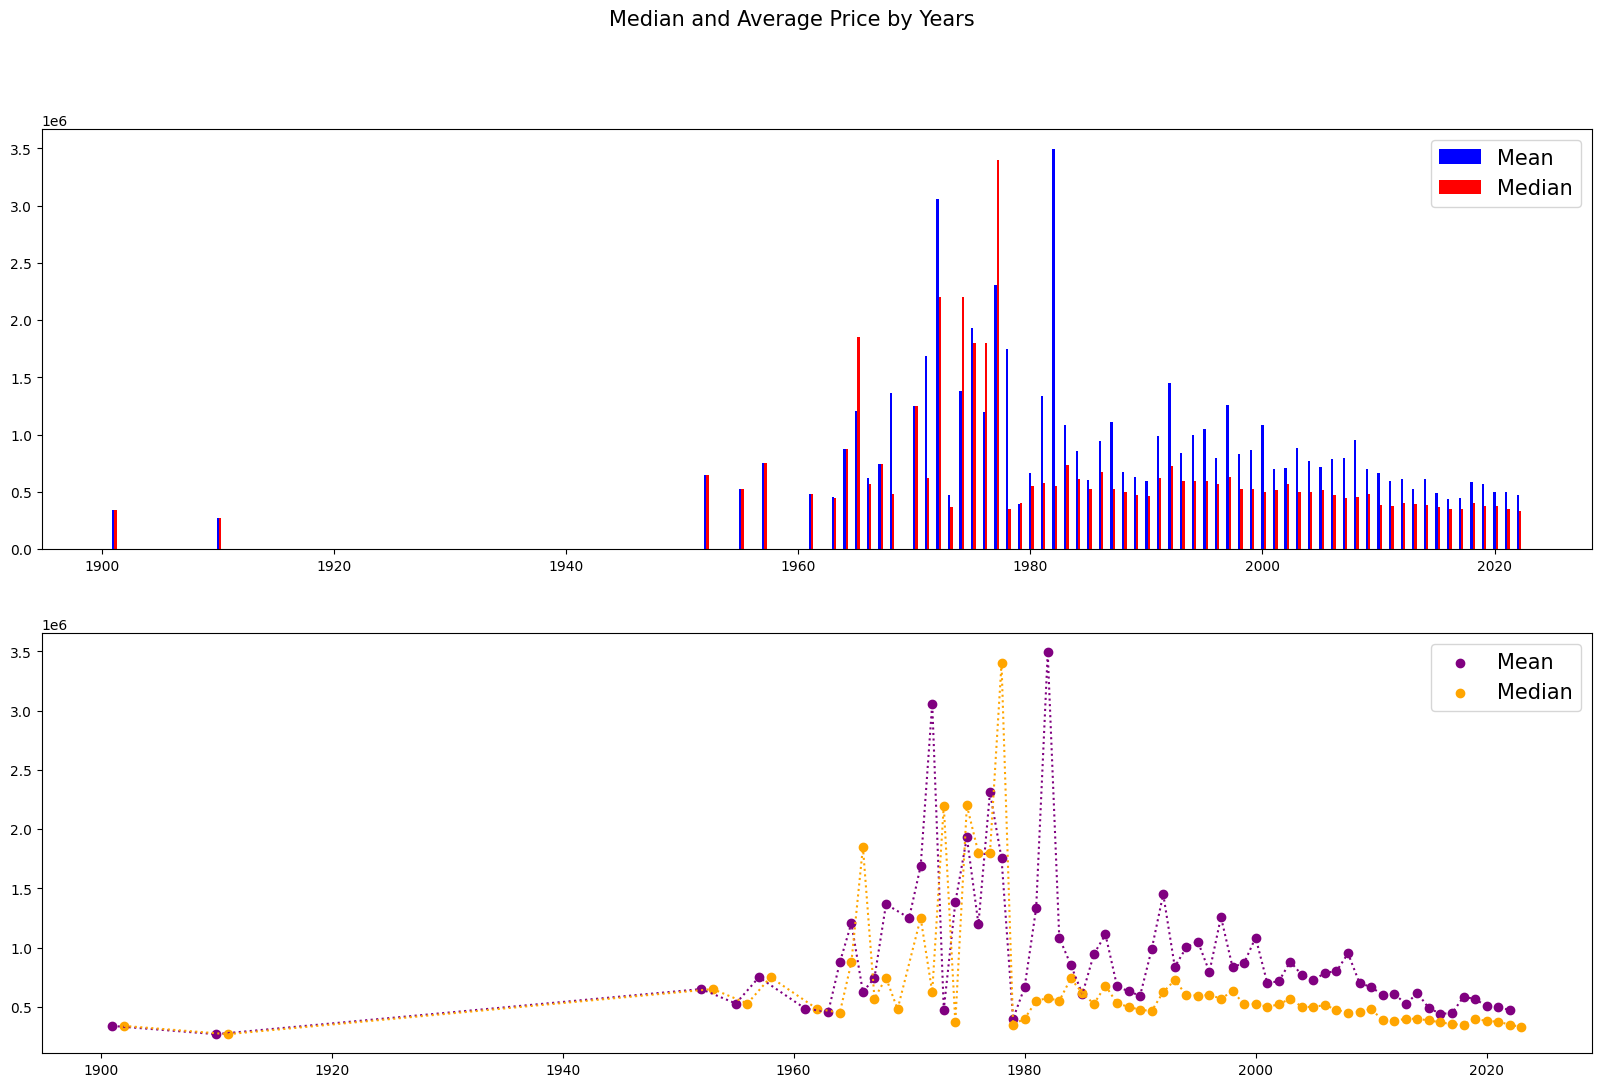

In [11]:
meanPrice = Data.groupby("year")["price"].mean()
medianPrice = Data.groupby("year")["price"].median()

meanPrice.index.sort_values(ascending = False)
medianPrice.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Median and Average Price by Years", fontsize = 15)

plt.subplot(2,1,1)
plt.bar(meanPrice.index, meanPrice, width = 0.2, color = "blue")
plt.bar(medianPrice.index+0.2, medianPrice, width = 0.2, color = "red")
plt.legend(["Mean", "Median"], fontsize = 15)

plt.subplot(2,1,2)
plt.scatter(meanPrice.index, meanPrice, color = "purple")
plt.scatter(medianPrice.index+1, medianPrice, color = "orange")
plt.plot(meanPrice.index, meanPrice, linestyle = ":", color = "purple")
plt.plot(medianPrice.index+1, medianPrice, linestyle = ":", color = "orange",)
plt.legend(["Mean", "Median"], fontsize = 15)



/tmp/ipykernel_14539/1896714800.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),annot=True,lw=1,linecolor='white',cmap='viridis')


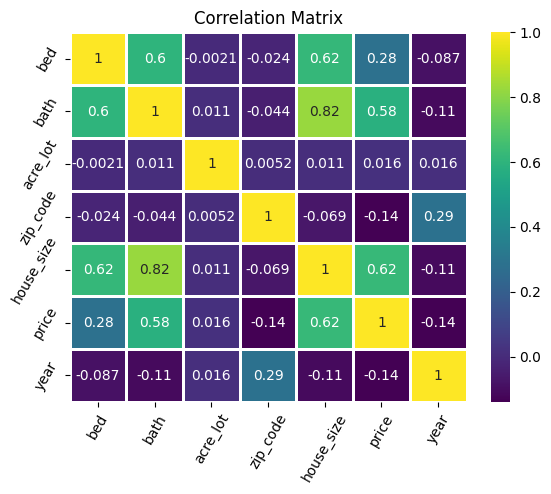

In [12]:
plt.figure(dpi=100)
plt.title('Correlation Matrix')
sns.heatmap(Data.corr(),annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

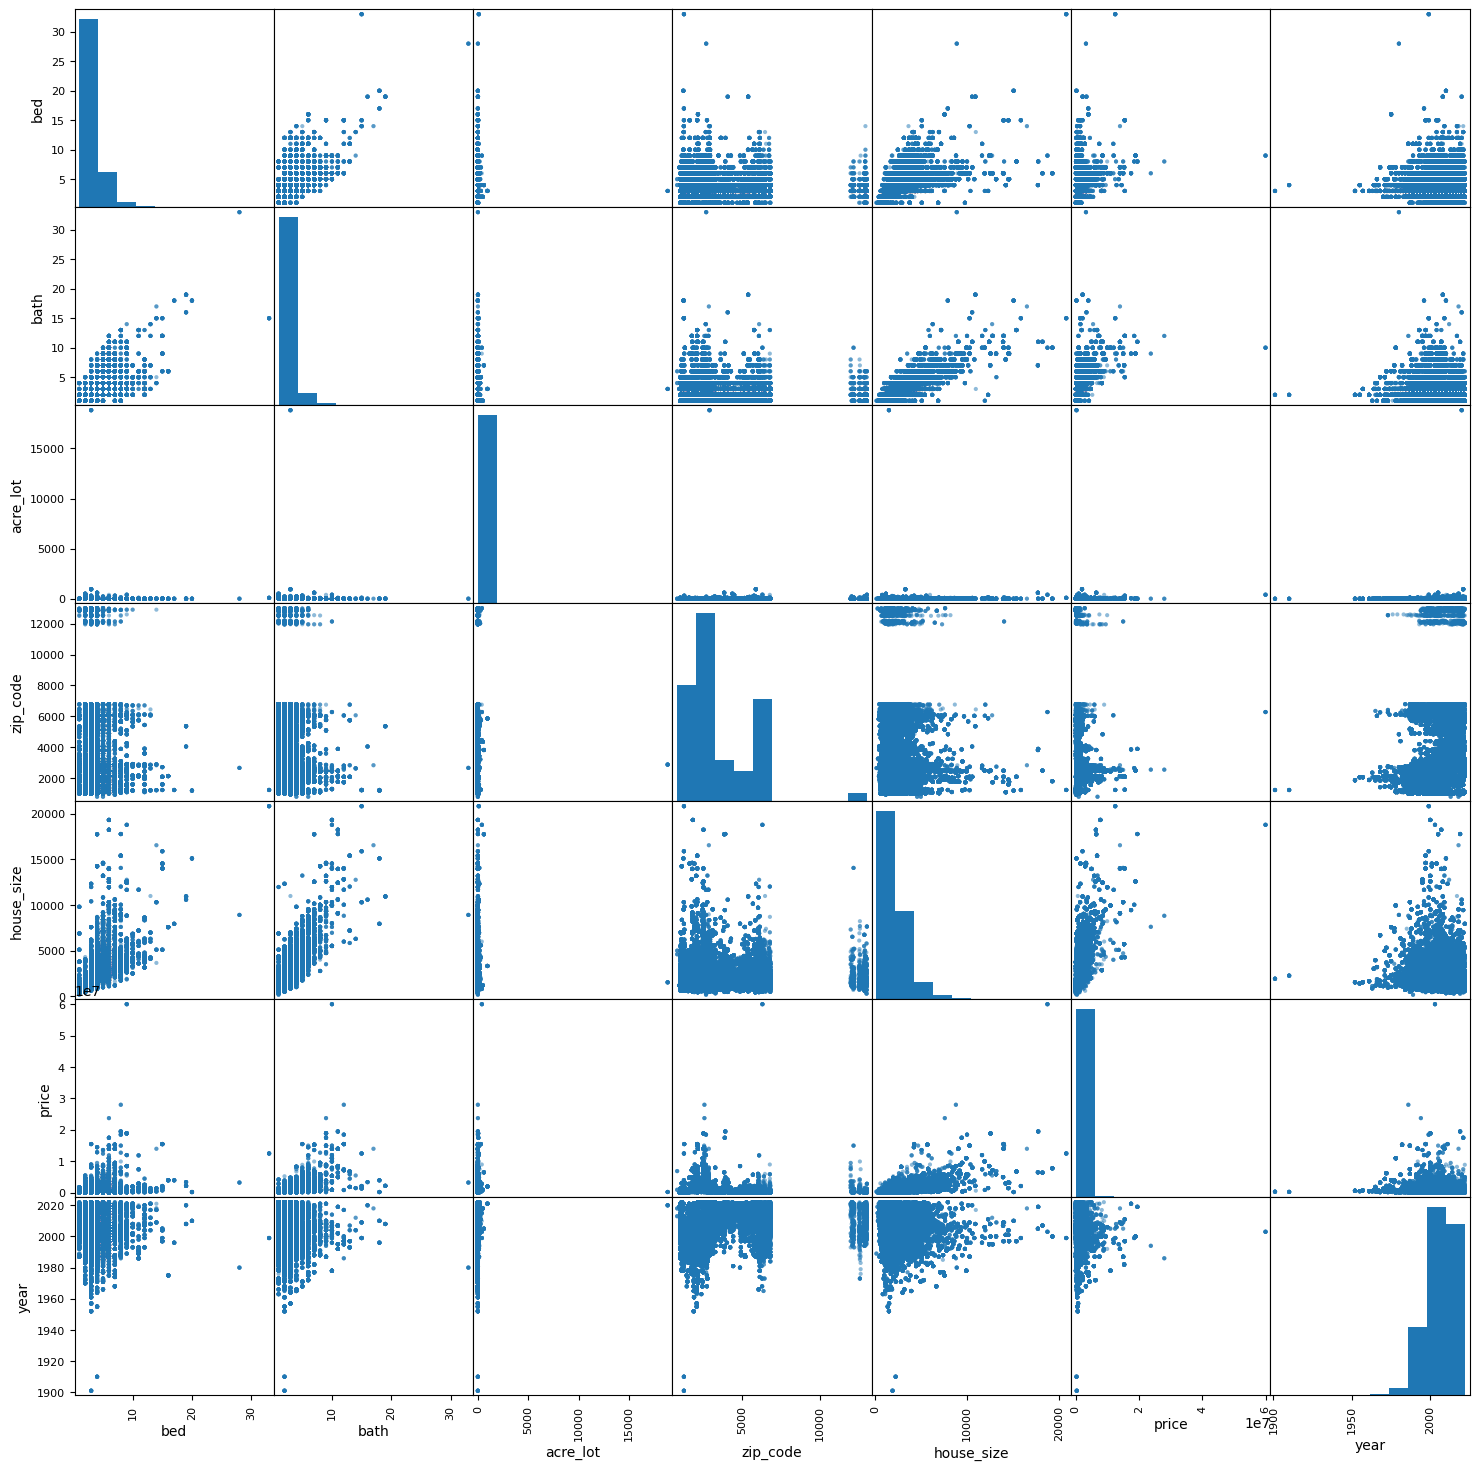

In [13]:
scaMat = pd.plotting.scatter_matrix(Data, alpha = 0.5, figsize=(18, 18), marker = ".")

# **Machine Learning**

In [14]:
LB = LabelEncoder()

Data["cityEnc"] = LB.fit_transform(Data["city"])
Data["stateEnc"] = LB.fit_transform(Data["state"])
Data

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,year,cityEnc,stateEnc
829,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019,191,5
3380,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019,191,5
5083,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019,191,5
5387,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019,191,5
9053,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,110000.0,2019,191,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407885,for_sale,4.0,1.0,0.26,Windham,Connecticut,6226.0,1254.0,2018-12-21,197000.0,2018,852,0
407886,for_sale,2.0,1.0,0.23,East Hartford,Connecticut,6118.0,624.0,2017-12-13,150000.0,2017,213,0
407887,for_sale,4.0,1.0,0.33,Wethersfield,Connecticut,6109.0,1238.0,2000-09-29,199900.0,2000,831,0
407888,for_sale,4.0,3.0,2.34,Coventry,Connecticut,6238.0,3320.0,2021-06-01,579900.0,2021,161,0


## **Train - Test Place**

In [15]:
x = Data[["bed", "bath", "acre_lot", "stateEnc","zip_code", "house_size"]]
y = Data[["price"]]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.33, random_state = 0)

## **Linear Regression**

In [16]:
LR = LinearRegression()
LR.fit(xTrain, yTrain)
predLR = LR.predict(xTest)


# **Decision Tree Regressor**

In [17]:
DT = DecisionTreeRegressor(random_state = 0)  
DT.fit(xTrain, yTrain)
predDT = DT.predict(xTest)


## **Random Forest Regressor**

In [18]:
RF = RandomForestRegressor(n_estimators = 10, random_state=0)
RF.fit(xTrain , yTrain.values.ravel())
predRF = RF.predict(xTest)


## **R-squared Scores**

Linear Regression R-squared Score        : 0.4268629232219927
Decision Tree Regressor R-squared Score  : 0.9893231450223852
Random Forest Regressor R-squared Score  : 0.9894903995410281


Text(0.5, 1.0, 'Scores')

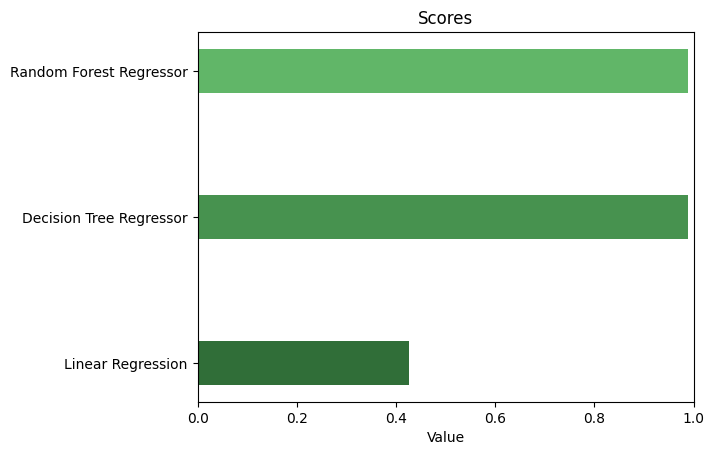

In [19]:
r2_0 = r2_score(yTest, predLR)
print("Linear Regression R-squared Score        : {}".format(r2_0))

r2_1 = r2_score(yTest, predDT)
print("Decision Tree Regressor R-squared Score  : {}".format(r2_1))

r2_2 = r2_score(yTest, predRF)
print("Random Forest Regressor R-squared Score  : {}".format(r2_2))

plt.barh(["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"], [r2_0, r2_1, r2_2],
        height = 0.3, color = ["#306E38", "#47924F", "#61B668"])
plt.xlim(0, 1)
plt.xlabel("Value")
plt.title("Scores")